**Data Preprocessing**

Extract and clean Ethiopian import data from Excel files for comprehensive analysis:

- HS Code: Provides detailed classification of imported goods for better understanding of trade patterns.
- Trader Information: Enhances insights into the importers and their business types, allowing for targeted market analysis.
- Outlier Detection: Identifies anomalies in import data that may indicate errors or unusual trading behavior.
- Data Normalization: Ensures consistency in numerical data for accurate comparisons and analyses.

First, import the required libraries and Python modules according to the project requirements.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Configure logging
from custom_logger import SetupLogger
# Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor  

logger = SetupLogger(log_file='../logs/notebooks.log').get_logger()

# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (14, 7)

In [2]:
# Create instance of DataProcessor
processor = DataPreprocessor(logger=logger)

**Load the data**

In [3]:
raw_data = processor.load_data()

**Explore the data**

In [4]:
raw_data.head()

,IMPEX,BANK PERMIT NUMBER,Reg. Date (Day/Mon/Year),TIN,Trader,Trader Address,Item,HS Code,HS Description,Commercial / Brand Name,...,VAT tobe paid (ETB),VAT paid (ETB),WH tax tobe paid (ETB),WH tax paid (ETB),Sur tax tobe paid (ETB),Sur tax paid (ETB),Social Wel Tax tobe paid (ETB),Social Wel Tax paid (ETB),Total tax tobe paid (ETB),Total tax paid (ETB)
0,IM,NaN,15/07/2022,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,3.0,39053000.0,"- Poly(vinyl alcohol), whether or not containi...",POLYVINYL ALCOHOL GOHSENOL GH 20R ( ),...,26.1,26.1,4.98,4.98,0.0,0.0,0.00,0.00,39.38,39.38
1,IM,ABAIBD01000432023,14/06/2023,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,1.0,39051200.0,-- In aqueous dispersion,HOMOPOLYMER ( ),...,581668.8,581668.8,110794.10,110794.10,0.0,0.0,110794.10,110794.10,987913.80,987913.80
2,IM,OIBIBD01006972023,09/09/2023,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,1.0,39051200.0,-- In aqueous dispersion,HOMOPOLYMER VISICOL 3001 OFF GRADE ( ),...,589354.1,589354.1,112257.90,112257.90,0.0,0.0,112257.90,112257.90,1000966.40,1000966.40
3,IM,ABAIBD01000502023,22/09/2023,0041705943ET02,A F TRADING PLC,14/670/199525/2006 (ADDIS ABABA) (ZN-ARADA WR-...,1.0,39051200.0,-- In aqueous dispersion,HOMOPOLYMER ( ),...,295155.2,295155.2,56220.03,56220.03,0.0,0.0,56220.03,56220.03,501295.31,501295.31
4,IM,UNBUBH01001882022,03/07/2022,0046675365AARI,ABDULAZIZ KEDIR HUSSEIN,29337/07 (ADDIS ABABA) (ZN-AKAKI KALITI WR-NO ...,1.0,39059900.0,-- Other,PP 25KG/BAG ( ),...,569065.3,569065.3,108393.40,0.00,0.0,0.0,0.00,0.00,858114.30,749720.90


In [5]:
raw_data.shape

(316, 36)

In [6]:
# Understand the data
inspection_results = processor.inspect_data(raw_data)

Data Inspection Summary:


,Column,Data Category,Data Type,Missing Values,Missing (%),Unique Values Count,Value Counts
0,IMPEX,Categorical/Text,object,2,0.63,2,{'IM': 314}
1,BANK PERMIT NUMBER,Categorical/Text,object,72,22.78,222,"{'DGBIBD01001292022': 3, 'DGBIBD01000542022': ..."
2,Reg. Date (Day/Mon/Year),Categorical/Text,object,2,0.63,213,"{'01/12/2022': 9, '23/11/2022': 5, '07/06/2023..."
3,TIN,Categorical/Text,object,2,0.63,133,"{'0000015683ET07': 28, '0006372325AA02': 12, '..."
4,Trader,Categorical/Text,object,2,0.63,129,"{'KADISCO PAINT AND ADHESIVE INDUSTRY': 28, 'C..."
5,Trader Address,Categorical/Text,object,2,0.63,129,{'001136/83 (ADDIS ABABA) (ZN-AKAKI KALITI WR-...
6,Item,Numeric,float64,2,0.63,23,"{1.0: 174, 2.0: 44, 3.0: 28, 4.0: 22, 5.0: 7, ..."
7,HS Code,Numeric,float64,2,0.63,8,"{39059900.0: 100, 39052100.0: 56, 39053000.0: ..."
8,HS Description,Categorical/Text,object,2,0.63,5,"{'-- Other': 144, '-- In aqueous dispersion': ..."
9,Commercial / Brand Name,Categorical/Text,object,2,0.63,221,"{'HOMOPOLYMER ( )': 11, 'BONDEX 5205 ( )': 8, ..."


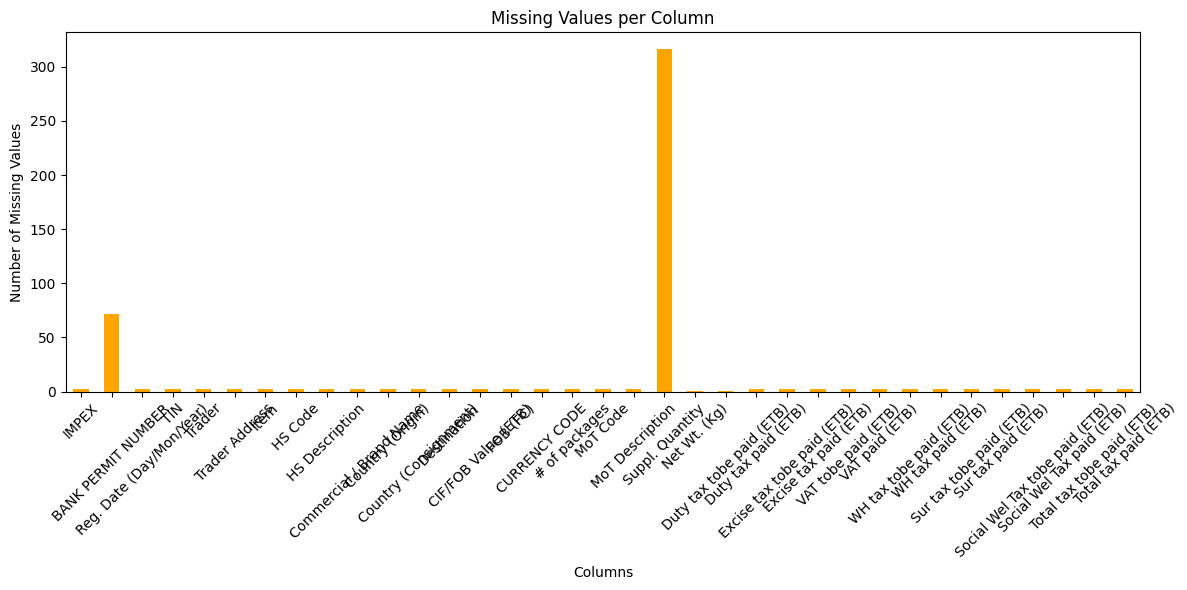

In [7]:
processor.plot_missing_values(raw_data)

- Here, we can see that 100% of supply quantity and 22.78% of bank permit number of the data has missing value. The next step will be handling missing values.

**Handling Missing Values**

In [8]:
raw_data = raw_data.drop(columns=['BANK PERMIT NUMBER', 'Suppl. Quantity'])

In [9]:
raw_data.shape

(316, 34)

In [10]:
raw_data = processor.handle_missing_values(raw_data)

c:\Users\USER\Desktop\chemical-import-insights\scripts\data_preprocessing.py:118: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TIN'].fillna("Unknown", inplace=True)
c:\Users\USER\Desktop\chemical-import-insights\scripts\data_preprocessing.py:127: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [11]:
raw_data.shape

(314, 34)

In [12]:
inspection_results = processor.inspect_data(raw_data)

Data Inspection Summary:


,Column,Data Category,Data Type,Missing Values,Missing (%),Unique Values Count,Value Counts
0,IMPEX,Categorical/Text,object,0,0.0,1,{'IM': 314}
1,Reg. date,Categorical/Text,object,0,0.0,212,"{'01/12/2022': 9, '23/11/2022': 5, '07/06/2023..."
2,TIN,Categorical/Text,object,0,0.0,132,"{'0000015683ET07': 28, '0006372325AA02': 12, '..."
3,Trader,Categorical/Text,object,0,0.0,128,"{'KADISCO PAINT AND ADHESIVE INDUSTRY': 28, 'C..."
4,Trader Address,Categorical/Text,object,0,0.0,128,{'001136/83 (ADDIS ABABA) (ZN-AKAKI KALITI WR-...
5,Item,Numeric,float64,0,0.0,22,"{1.0: 174, 2.0: 44, 3.0: 28, 4.0: 22, 5.0: 7, ..."
6,HS Code,Numeric,float64,0,0.0,7,"{39059900.0: 100, 39052100.0: 56, 39053000.0: ..."
7,HS Description,Categorical/Text,object,0,0.0,4,"{'-- Other': 144, '-- In aqueous dispersion': ..."
8,Commercial / Brand Name,Categorical/Text,object,0,0.0,220,"{'HOMOPOLYMER ( )': 11, 'BONDEX 5205 ( )': 8, ..."
9,Country (Origin),Categorical/Text,object,0,0.0,22,"{'China': 68, 'India': 49, 'United Arab Emirat..."


**Data Type Conversion**

In [13]:
raw_data = processor.convert_data_types(raw_data)

In [14]:
raw_data.dtypes

IMPEX                                     object
Reg. date                         datetime64[ns]
TIN                                       object
Trader                                    object
Trader Address                            object
Item                                       Int64
HS Code                                    Int64
HS Description                            object
Commercial / Brand Name                   object
Country (Origin)                          object
Country (Consignment)                     object
Destination                               object
CIF/FOB Value (ETB)                      float64
FOB (FC)                                 float64
CURRENCY CODE                             object
# of packages                              Int64
MoT Code                                   Int64
MoT Description                           object
Gross Wt. (Kg)                           float64
Net Wt. (Kg)                             float64
Duty tax tobe paid (

**Text Cleaning:**
- Standardize text data (e.g., lowercase, remove special characters).
- Handle inconsistencies in trader names and addresses.

In [15]:
text_columns = ['Trader','Trader Address','HS Description','Commercial / Brand Name','Country (Origin)','Country (Consignment)','Destination','CURRENCY CODE','MoT Description']
processor.clean_text_data(raw_data, text_columns)

,IMPEX,Reg. date,TIN,Trader,Trader Address,Item,HS Code,HS Description,Commercial / Brand Name,Country (Origin),...,VAT tobe paid (ETB),VAT paid (ETB),WH tax tobe paid (ETB),WH tax paid (ETB),Sur tax tobe paid (ETB),Sur tax paid (ETB),Social Wel Tax tobe paid (ETB),Social Wel Tax paid (ETB),Total tax tobe paid (ETB),Total tax paid (ETB)
0,IM,2022-07-15,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,3,39053000,"- POLY(VINYL ALCOHOL), WHETHER OR NOT CONTAINI...",POLYVINYL ALCOHOL GOHSENOL GH 20R ( ),CHINA,...,26.10,26.10,4.98,4.98,0.0,0.0,0.00,0.00,39.38,39.38
1,IM,2023-06-14,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,1,39051200,-- IN AQUEOUS DISPERSION,HOMOPOLYMER ( ),UNITED ARAB EMIRATES,...,581668.80,581668.80,110794.10,110794.10,0.0,0.0,110794.10,110794.10,987913.80,987913.80
2,IM,2023-09-09,0039580266ET03,A E CHEMICALS TRADING PLC,X (ADDIS ABABA) (ZN-YEKA WR-NO WOREDA-143) (KB...,1,39051200,-- IN AQUEOUS DISPERSION,HOMOPOLYMER VISICOL 3001 OFF GRADE ( ),UNITED ARAB EMIRATES,...,589354.10,589354.10,112257.90,112257.90,0.0,0.0,112257.90,112257.90,1000966.40,1000966.40
3,IM,2023-09-22,0041705943ET02,A F TRADING PLC,14/670/199525/2006 (ADDIS ABABA) (ZN-ARADA WR-...,1,39051200,-- IN AQUEOUS DISPERSION,HOMOPOLYMER ( ),UNITED ARAB EMIRATES,...,295155.20,295155.20,56220.03,56220.03,0.0,0.0,56220.03,56220.03,501295.31,501295.31
4,IM,2022-07-03,0046675365AARI,ABDULAZIZ KEDIR HUSSEIN,29337/07 (ADDIS ABABA) (ZN-AKAKI KALITI WR-NO ...,1,39059900,-- OTHER,PP 25KG/BAG ( ),THAILAND,...,569065.30,569065.30,108393.40,0.00,0.0,0.0,0.00,0.00,858114.30,749720.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,IM,2023-07-18,0055267582AAFI,ZHIBIN WANG -----,EIC-IP/25164/10 (ADDIS ABABA) (ZN-NEFAS SILK L...,2,39059900,-- OTHER,RE-DISPERSIBLE EMULSION POWDER ( ),CHINA,...,292344.80,292344.80,55684.71,0.00,0.0,0.0,55684.71,55684.71,496522.07,440837.36
310,IM,2023-07-18,0055267582AAFI,ZHIBIN WANG -----,EIC-IP/25164/10 (ADDIS ABABA) (ZN-NEFAS SILK L...,6,39053000,"- POLY(VINYL ALCOHOL), WHETHER OR NOT CONTAINI...",POLYVINYL ALCHOL ( ),CHINA,...,120866.20,120866.20,23022.15,0.00,0.0,0.0,23022.15,23022.15,205280.75,182258.60
311,IM,2023-02-06,0055267582AAFI,ZHIBIN WANG -----,EIC-IP/25164/10 (ADDIS ABABA) (ZN-NEFAS SILK L...,2,39052900,-- OTHER,RE-DISPERSIBLE EMULSION POWDER ( ),CHINA,...,74049.60,74049.60,14104.68,0.00,0.0,0.0,0.00,0.00,111662.08,97557.40
312,IM,2023-11-28,0086235515ET02,ZOI ENGINEERING AND TRADE PLC,MT/AA/14/706/4611130/2016 (ADDIS ABABA) (ZN-KI...,4,39053000,"- POLY(VINYL ALCOHOL), WHETHER OR NOT CONTAINI...",POLY VINYL ALCHOHOL ( ),ITALY,...,18587.25,18587.25,3540.42,3540.42,0.0,0.0,3540.42,3540.42,31568.79,31568.79


In [19]:
raw_data.to_csv('../data/cleaned/cleaned_import_data.csv')